**Preprocesamiento de la base de datos de Consumo Electrico**

Este archivo consta de los codigos y conclusiones de:
* 1.Separar en datos de entrenamiento y de prueba.
* 2.Preparar datos para realizar aprendizaje supervizado.


# Carga de Librerias y Datos


*Se importan los módulos necesarios para trabajar*

In [ ]:
#Pandas es utilizado para leer los set de datos
import pandas as pd
#Numpy es utilizado para generar las series de datos a graficar
import numpy as np
#Seaborn es utilizado para generar los gráficos
import seaborn as sns
import matplotlib.pyplot as plt
#Se importan modulos estadisticos para generar test de hipotesis, entre otros
from sklearn.preprocessing import StandardScaler, MaxAbsScaler, MinMaxScaler
#Módulos implementa funciones que evalúan el error de predicción para propósitos específicos
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
#Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

#Dividir arreglos o matrices en subconjuntos aleatorios de tren y prueba
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from numpy import array

#Modelos de machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [ ]:
pip install prince --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.7/414.7 kB 13.3 MB/s eta 0:00:00


In [ ]:
import prince

In [ ]:
# Para acceder a los archivos del gdrive
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [ ]:
cd /content/gdrive/MyDrive/Tesis/Datos-2

/content/gdrive/MyDrive/Tesis/Datos-2


In [ ]:
df=pd.read_csv('df_EDA.csv',
                parse_dates={'dt':['Date','time']},
                infer_datetime_format=True,
                low_memory=False,
                index_col='dt')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
 7   other_consumption      float64
dtypes: float64(8)
memory usage: 142.5 MB


In [ ]:
df.shape

(2075259, 8)

In [ ]:
## resampling of data over hour
df = df.resample('D').mean()
df.shape

(1442, 8)

In [ ]:
df

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,other_consumption
dt,,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,37.073064
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,25.657407
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,13.214190
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,9.119375
2006-12-20,1.545658,0.111804,242.308062,6.467361,0.000000,1.838889,9.765972,14.156111
...,...,...,...,...,...,...,...,...
2010-11-22,1.417733,0.098857,240.197118,6.014167,3.371528,1.465278,7.038889,11.753194
2010-11-23,1.095511,0.095451,240.575528,4.674444,1.299306,0.318056,5.285417,11.355741
2010-11-24,1.247394,0.091986,240.030965,5.249583,0.761111,1.977778,8.488889,9.562130


#2.Normalizar base de datos

El **método de puntuación z** (a menudo llamado estandarización ) transforma los datos en una distribución con una media de 0 y una desviación estándar de 1 . Cada valor estandarizado se calcula restando la media de la característica correspondiente y luego dividiendo por la desviación estándar.

In [ ]:
#Seleccion de caracteristicas
features =df.columns

#Se define escalado
std_scaler = StandardScaler()
min_scaler= MinMaxScaler()

#Transformacion

for i in features:
  df[i] = min_scaler.fit_transform(df[i].values.reshape(-1,1))

df_pca=df.copy()
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,other_consumption
dt,,,,,,,,
2006-12-16,0.917517,0.303922,0.315385,0.929608,0.000000,0.163965,0.654705,0.860049
2006-12-17,0.696936,0.540899,0.550494,0.699954,0.181130,0.345776,0.487610,0.584569
2006-12-18,0.436888,0.387216,0.620518,0.433545,0.094708,0.216451,0.512354,0.284293
2006-12-19,0.319068,0.361249,0.667476,0.322190,0.074751,0.627798,0.226499,0.185478
2006-12-20,0.441693,0.385316,0.686364,0.436948,0.000000,0.218680,0.513999,0.307023


In [ ]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,other_consumption
count,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,0.297005,0.424962,0.596510,0.298518,0.142462,0.153159,0.337880,0.189869
std,0.133321,0.120994,0.125216,0.130307,0.141583,0.172429,0.139425,0.104017
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.209597,0.339570,0.549792,0.215699,0.051653,0.035511,0.242918,0.121575
50%,0.292126,0.409713,0.604598,0.293503,0.098984,0.056487,0.338743,0.176239
75%,0.369093,0.487462,0.660445,0.367266,0.196164,0.225617,0.429459,0.242397
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Separacion de datos

In [ ]:
#Se separa conjunto en entrenamiento y prueba; sin aleatoriedad
#Dejando un %30 de la data para test
X_train, X_test, Y_train, Y_test = train_test_split(df[['Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'other_consumption']], df[['Global_active_power']], test_size=0.3, shuffle=False)

shape=len(X_train.columns)

print("Separacion de datos terminada!")

Separacion de datos terminada!


#Seleccion de caracteristicas

##Usando Shap con RandomForestRegressor

In [ ]:
pip install shap --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 21.8 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
# Prepares a default instance of the random forest regressor
model = RandomForestRegressor(n_estimators=150)
# Fits the model on the data
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=150)

In [ ]:
# Fits the explainer
explainer = shap.Explainer(model.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)

Exact explainer: 434it [01:16,  5.00it/s]


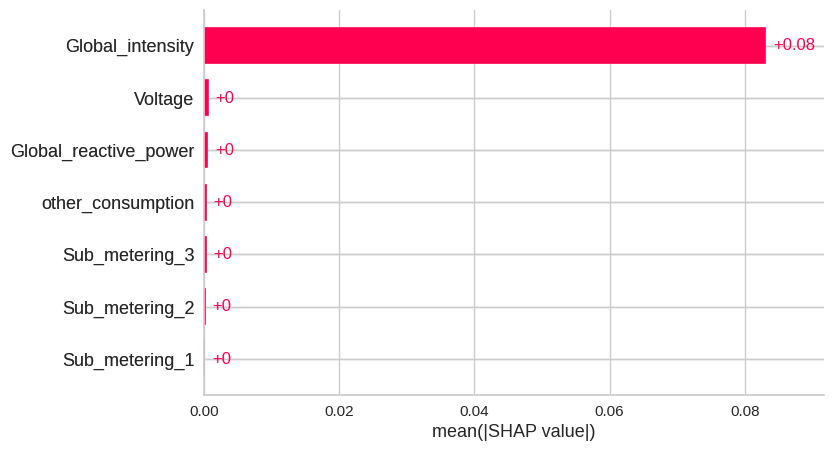

In [ ]:
shap.plots.bar(shap_values)

##Ramdom forest regresor, para RFECV

In [ ]:
from sklearn.feature_selection import RFECV

In [ ]:
estimator = RandomForestRegressor(n_estimators=150)

In [ ]:
# Crear una instancia de RFECV con validación cruzada
rfecv = RFECV(estimator=estimator,step=3, cv=TimeSeriesSplit(n_splits=50))

# Aplicar la eliminación recursiva de características con validación cruzada
X_selected = rfecv.fit(X_train, Y_train)

# Obtener las características seleccionadas
selected_features = X_train.columns[rfecv.support_]
print(selected_features)

Index(['Voltage', 'Global_intensity', 'Sub_metering_2', 'other_consumption'], dtype='object')


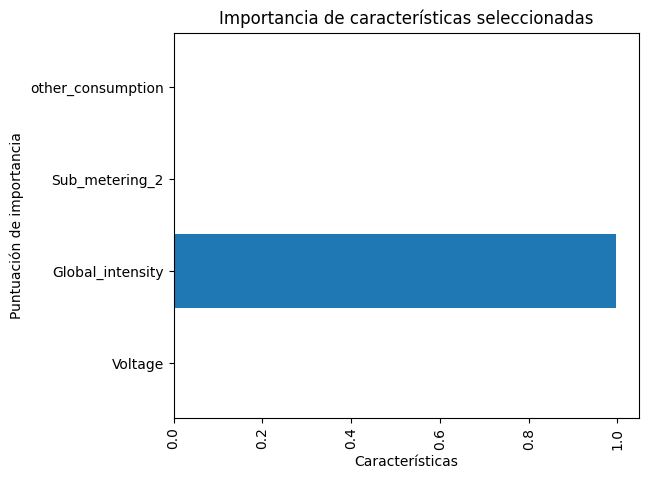

In [ ]:
# Obtener las puntuaciones de importancia de características
feature_importances = rfecv.estimator_.feature_importances_

# Crear un gráfico de barras para visualizar las puntuaciones de importancia de características
plt.figure(figsize=(6, 5))
plt.barh(range(len(feature_importances)), feature_importances, tick_label=selected_features)
plt.xticks(rotation=90)
plt.xlabel('Características')
plt.ylabel('Puntuación de importancia')
plt.title('Importancia de características seleccionadas')
plt.show()

##Analisis de correlacion

<Axes: >

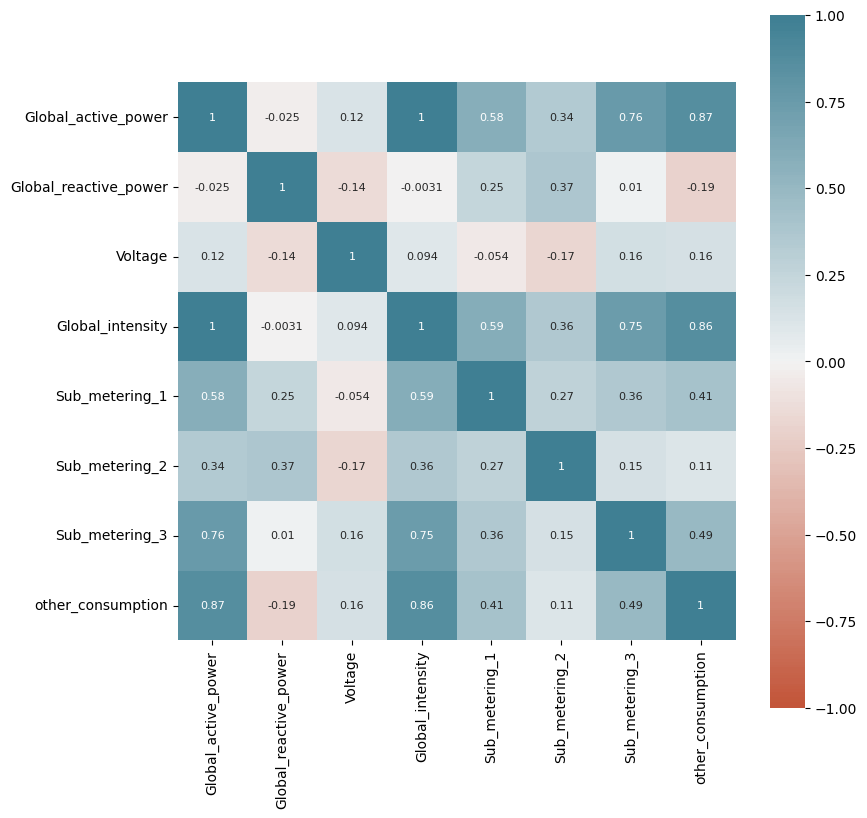

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(
    df.corr("spearman"),
    annot     = True,
    cbar      = True,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
)

<Axes: >

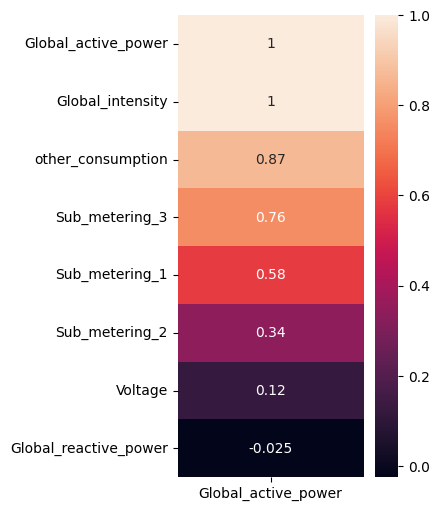

In [ ]:
fig, ax = plt.subplots(figsize=(3,6))
corr = df.corr('spearman')[['Global_active_power']].sort_values(by='Global_active_power', ascending=False)
sns.heatmap(corr, annot=True)

## Sección nueva

In [ ]:
scores

,0
0,0.011238
1,12.539200
2,743474.826809
3,393.491163
4,310.047340
5,1290.272940
6,4767.506609


In [ ]:
# 1. Selección Univariante
selector = SelectKBest(score_func=f_regression, k=1)
fit = selector.fit(X_train, Y_train)
scores = pd.DataFrame(fit.scores_)
columns = pd.DataFrame(X_train.columns)
feature_scores = pd.concat([columns, scores], axis=1)
feature_scores.columns = ['Feature', 'Score']
print("Selección Univariante:\n", feature_scores.nlargest(7, 'Score'), "\n")

Selección Univariante:
                  Feature          Score
2       Global_intensity  743474.826809
6      other_consumption    4767.506609
5         Sub_metering_3    1290.272940
3         Sub_metering_1     393.491163
4         Sub_metering_2     310.047340
1                Voltage      12.539200
0  Global_reactive_power       0.011238 



In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

In [ ]:
selector = SelectKBest(score_func=f_regression, k=7)

In [ ]:
selector.fit(X_train, Y_train)

SelectKBest(k=7, score_func=<function f_regression at 0x7f0c69f9c310>)

In [ ]:
feature_scores = selector.scores_
selected_features = selector.get_support(indices=True)

In [ ]:
X_selected = selector.transform(X_train)
X_selected

#PCA

In [ ]:
# Asignar las categorías
df_pca['Global_active_power'] = pd.cut(df_pca['Global_active_power'], bins=[0, 0.3, 0.7, 1], labels=['bajo', 'promedio', 'alto'], include_lowest=True)

In [ ]:
df_pca

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,other_consumption
dt,,,,,,,,
2006-12-16,0.917517,0.303922,0.315385,0.929608,0.000000,0.163965,0.654705,0.860049
2006-12-17,0.696936,0.540899,0.550494,0.699954,0.181130,0.345776,0.487610,0.584569
2006-12-18,0.436888,0.387216,0.620518,0.433545,0.094708,0.216451,0.512354,0.284293
2006-12-19,0.319068,0.361249,0.667476,0.322190,0.074751,0.627798,0.226499,0.185478
2006-12-20,0.441693,0.385316,0.686364,0.436948,0.000000,0.218680,0.513999,0.307023
...,...,...,...,...,...,...,...,...
2010-11-22,0.401323,0.340695,0.557228,0.403198,0.432555,0.174251,0.370468,0.249036
2010-11-23,0.299639,0.328958,0.580377,0.303428,0.166696,0.037823,0.278180,0.239445
2010-11-24,0.347569,0.317016,0.547064,0.346259,0.097648,0.235197,0.446784,0.196162


In [ ]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

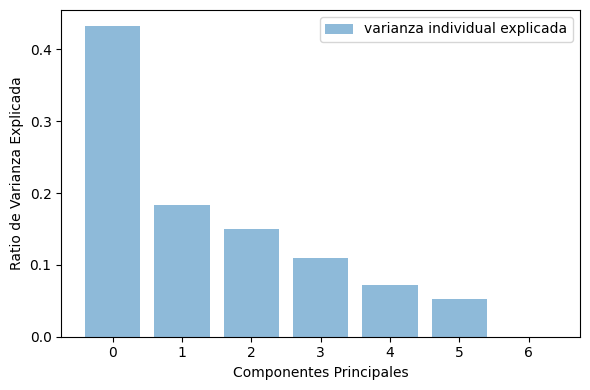

In [ ]:
# Ajustar el modelo PCA
pca = PCA()
principalComponents = pca.fit_transform(X_train)

# Graficar la varianza explicada
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(6, 4))
plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5,
            align='center', label='varianza individual explicada')
plt.ylabel('Ratio de Varianza Explicada')
plt.xlabel('Componentes Principales')
plt.legend()
plt.tight_layout()

In [ ]:
# Obtener las variables del DataFrame
variables = list(df_pca.drop('Global_active_power', axis=1).columns)
# Obtener los autovectores correspondientes a las primeras 4 componentes
autovectores = pca.components_[:4]

# Crear una tabla con las variables y los autovectores
tabla = pd.DataFrame(autovectores.T, columns=['Componente 1', 'Componente 2', 'Componente 3', 'Componente 4'], index=variables)

# Mostrar la tabla
tabla


,Componente 1,Componente 2,Componente 3,Componente 4
Global_reactive_power,0.081887,0.330092,0.499914,-0.445910
Voltage,0.027534,-0.386279,-0.267615,-0.859406
Global_intensity,0.549996,-0.238702,-0.031316,0.122646
Sub_metering_1,0.385900,0.002795,0.678202,-0.064842
Sub_metering_2,0.515094,0.688627,-0.457794,-0.121878
Sub_metering_3,0.382007,-0.323337,-0.032120,0.063128
other_consumption,0.360376,-0.325711,-0.083206,0.156526


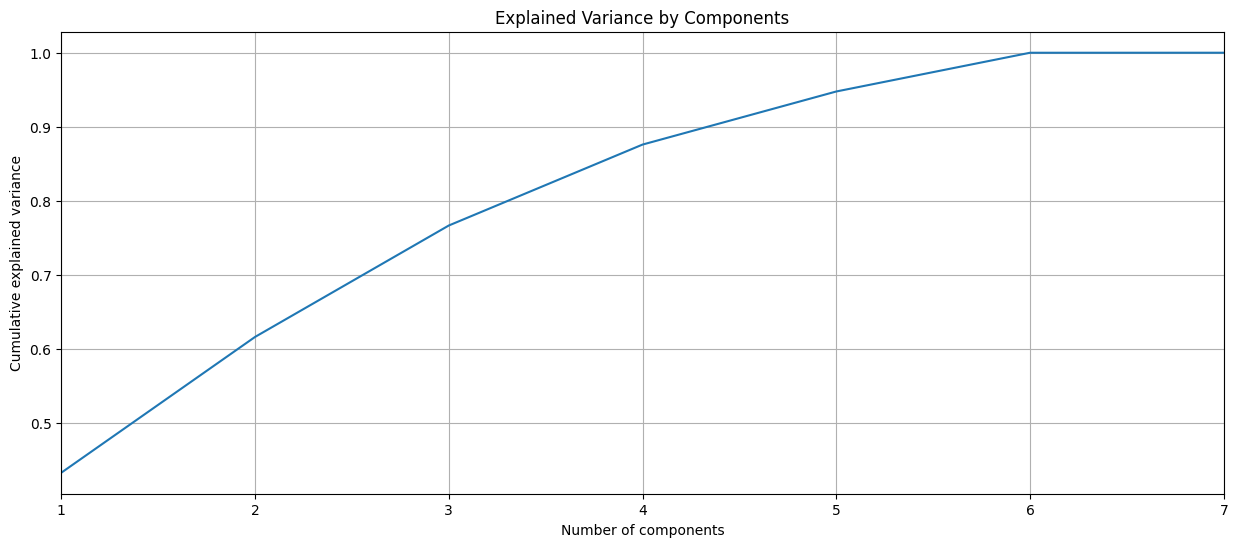

In [ ]:
# Graficar el porcentaje de varianza explicado
plt.figure(figsize=(15,6))
plt.plot(np.arange(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance by Components')
plt.xticks(np.arange(1, len(pca.explained_variance_ratio_)+1))
plt.xlim(1, 7)  # Establecer límites en el eje x
plt.grid(True)
plt.show()

In [ ]:
import plotly.graph_objects as go

# Asignamos colores a cada punto de acuerdo a si el pasajero sobrevivió o no
colors = df.Global_active_power.map({'alto': 'red', 'promedio': 'green', 'bajo': 'blue'})

# Obtener las primeras 2 y 3 componentes del PCA
componentes_2d = pca.transform(X_train)[:, :2]
componentes_3d = pca.transform(X_train)[:, :3]

# Gráfico 2D
fig2d = go.Figure(data=go.Scatter(x=componentes_2d[:,0], y=componentes_2d[:,1], mode='markers', marker=dict(color=colors)))
fig2d.update_layout(title='PCA - 2D', xaxis_title='Component 1', yaxis_title='Component 2')
fig2d.show()

# Gráfico 3D
fig3d = go.Figure(data=go.Scatter3d(x=componentes_3d[:,0], y=componentes_3d[:,1], z=componentes_3d[:,2], mode='markers', marker=dict(color=colors)))
fig3d.update_layout(scene = dict(xaxis_title='Component 1', yaxis_title='Component 2', zaxis_title='Component 3'), title='PCA - 3D')
fig3d.show()

In [ ]:
pca = prince.PCA(
    n_components=3,
    n_iter=3,
    rescale_with_mean=True,
    rescale_with_std=True,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
pca = pca.fit(df)

In [ ]:
pca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,3.895,48.68%,48.68%
1,1.334,16.67%,65.35%
2,0.970,12.12%,77.47%


In [ ]:
pca.column_coordinates_

component,0,1,2
variable,,,
Global_active_power,0.993053,-0.084040,0.058337
Global_reactive_power,0.116420,0.767783,-0.513931
Voltage,0.122726,-0.538518,-0.756609
Global_intensity,0.993810,-0.053000,0.068819
Sub_metering_1,0.614077,0.447340,-0.125959
Sub_metering_2,0.517174,0.374821,0.181559
Sub_metering_3,0.741550,-0.175575,-0.200299
other_consumption,0.835275,-0.269993,0.189572


In [ ]:
coordenadas_componentes = pca.column_coordinates_

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import prince
import numpy as np
from sklearn.mixture import GaussianMixture
import plotly.graph_objects as go
import plotly.graph_objects as go

# Transpone el DataFrame para que los nombres de las variables sean las columnas
coordenadas_componentes_transposed = coordenadas_componentes.T

# Gráfico 2D con Plotly
trace = go.Scatter(x=coordenadas_componentes_transposed.loc[0],
                   y=coordenadas_componentes_transposed.loc[1],
                   mode='markers+text',
                   text=coordenadas_componentes_transposed.columns,
                   textposition='top center')
layout = go.Layout(title='Gráfico 2D',
                   xaxis=dict(title='Component 1'),
                   yaxis=dict(title='Component 2'))
fig2d = go.Figure(data=[trace], layout=layout)
fig2d.show()

# Gráfico 3D con Plotly
trace = go.Scatter3d(x=coordenadas_componentes_transposed.loc[0],
                     y=coordenadas_componentes_transposed.loc[1],
                     z=coordenadas_componentes_transposed.loc[2],
                     mode='markers+text',
                     text=coordenadas_componentes_transposed.columns,
                     textposition='top center')
layout = go.Layout(title='Gráfico 3D',
                   scene=dict(xaxis=dict(title='Component 1'),
                              yaxis=dict(title='Component 2'),
                              zaxis=dict(title='Component 3')))
fig3d = go.Figure(data=[trace], layout=layout)
fig3d.show()